<a href="https://colab.research.google.com/github/Technorganic1/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Vincent_Emma_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving haberman.data to haberman.data


In [0]:
from google.colab import files
uploaded = files.upload()

Saving haberman.names to haberman.names


In [0]:
!ls

haberman.data  haberman.names  sample_data


In [299]:
df = pd.read_csv('haberman.data', skiprows=-1)
print(df.shape)
df.head(7)

(305, 4)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2


In [0]:
df.columns = ['Age', 'Year_of_operation', 'Positive_axillary_nodes', 'Survival_status']

In [91]:
df.head()

,Age,Year_of_operation,Positive_axillary_nodes,Survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [92]:
df.isna().sum()

Age                        0
Year_of_operation          0
Positive_axillary_nodes    0
Survival_status            0
dtype: int64

In [93]:
df.count()

Age                        305
Year_of_operation          305
Positive_axillary_nodes    305
Survival_status            305
dtype: int64

In [94]:
df['Survival_status'].value_counts()

1    224
2     81
Name: Survival_status, dtype: int64

In [117]:
df['Positive_axillary_nodes'].value_counts()

0     136
1      40
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: Positive_axillary_nodes, dtype: int64

In [0]:
df['survived'] = df['Survival_status'].apply(lambda val: 0 if val == 2 else 1)

In [310]:
#oh my god this took me like two hours after i went back to it since i started plotting lol
#
df.head(10)

,Age,Year_of_operation,Positive_axillary_nodes,Survival_status,survived
0,30,62,3,1,1
1,30,65,0,1,1
2,31,59,2,1,1
3,31,65,4,1,1
4,33,58,10,1,1
5,33,60,0,1,1
6,34,59,0,2,0
7,34,66,9,2,0
8,34,58,30,1,1
9,34,60,1,1,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

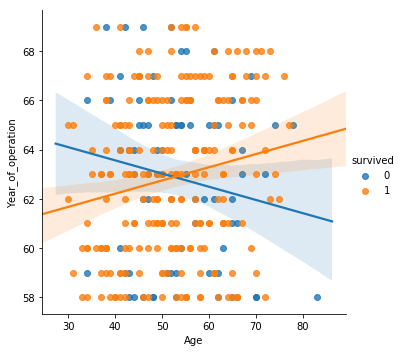

In [327]:
sns.lmplot(x='Age', y='Year_of_operation', data=df, hue='survived');

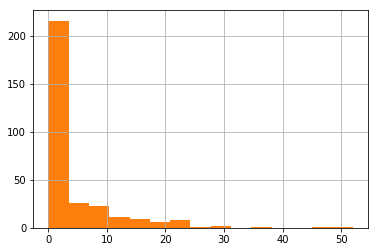

In [312]:
plt.hist(df['Positive_axillary_nodes'], bins=15)
df['Positive_axillary_nodes'].hist(bins=15);

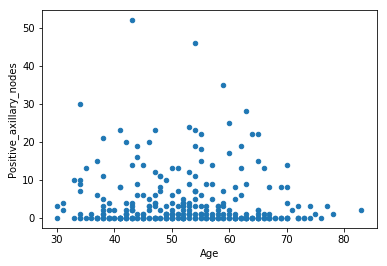

In [313]:
df.plot.scatter('Age', 'Positive_axillary_nodes');

In [0]:
age_bins = pd.cut(df['Age'], 5)
year_bins = pd.cut(df['Year_of_operation'], 5)
node_bins = pd.cut(df['Positive_axillary_nodes'], 5)
alive_bins = pd.cut(df['survived'], 5)

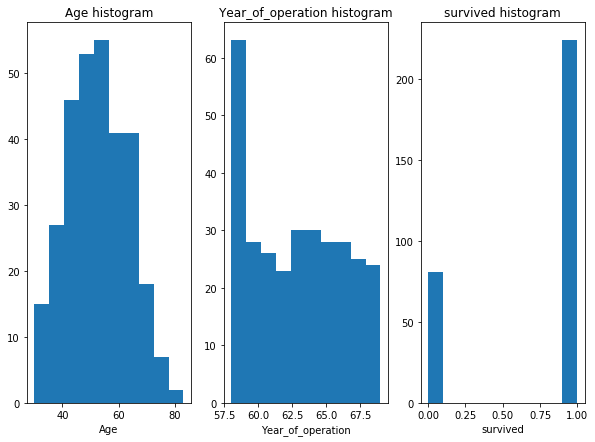

In [322]:
fig, ax = plt.subplots(1, 3, figsize = (10, 7))
ax[0].hist(df.Age)
ax[0].set_xlabel('Age')
ax[0].set_title('Age histogram')

ax[1].hist(df.Year_of_operation)
ax[1].set_xlabel('Year_of_operation')
ax[1].set_title('Year_of_operation histogram')

ax[2].hist(df.survived)
ax[2].set_xlabel('survived')
ax[2].set_title('survived histogram');

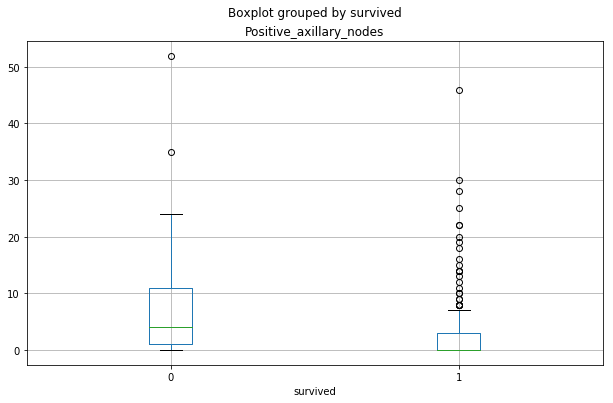

In [323]:
df.boxplot(column='Positive_axillary_nodes', by='survived', figsize=(10,6));

In [332]:
#i think I wrote this whole code wrong but I'm not sure why

#sort of ran out of time :(


age_and_node_vs_alive = pd.crosstab([age_bins, node_bins], alive_bins)
year_and_node_vs_age = pd.crosstab([year_bins, node_bins], age_bins)
year_and_age_vs_node = pd.crosstab([year_bins, age_bins], node_bins)
alive_and_node_vs_age = pd.crosstab([alive_bins, node_bins], age_bins)

TypeError: ignored

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

###1. Typically people who had the operation before around 41 years olf and somewhat after 78 tended to have a higher rate of survival.
###2. Seems that during those dangerous age ranges more axillary nodes were used in low survivability operations. More paitent imformation is needed to assess if patiens had other symptoms that could lead to not surviving.

###3. I can't make an accurate statement without more important imformation about the types of people or axillary nodes used, sometimes there were no nodes used and survived and other times no nodes were used and patients died.